# Exam project - 2020

In [2]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm
from scipy import optimize 
from scipy import interpolate
from matplotlib import cm

# 1) Linear regression

We consider the linear regression model

$ y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \epsilon_i $

Assume you have access to data of the **independent variables** ($x_{1,i}$, $x_{2,i}$) and the **dependent variable** ($y_i$) for $N$ individuals, where $i$ indexes individuals. The variable $\epsilon_i$ is a mean-zero **stochastic shock**.

The data generating process is given by:

In [3]:
def DGP(N):

 # a. independent variables
 x1 = np.random.normal(0,1,size=N)
 x2 = np.random.normal(0,1,size=N)

 # b. errors
 eps = np.random.normal(0,1,size=N)

 extreme = np.random.uniform(0,1,size=N)
 eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
 eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]

 # c. dependent variable
 y = 0.1 + 0.3*x1 + 0.5*x2 + eps

 return x1, x2, y

In [4]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

In [4]:
print(x1,x2,y)

[-1.76884571  0.07555227 -1.1306297  ...  0.0370484   1.70892684
  2.06128052] [-0.18279442  0.78062368 -1.01220533 ... -1.44286811 -0.10668645
  0.55908184] [-1.06458366  0.58562919 -0.91755295 ... -6.98529298  0.08526139
  0.70458339]


## Question 1 ##

Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **ordinary least squares (OLS)** implemented with **matrix algebra** by

$$ \hat{\mathbf{\beta}} = (\mathbf{X}^{\prime}\mathbf{X})^{-1}\mathbf{X}^{\prime}\mathbf{y} $$

where $\mathbf{X}^{\prime}$ is the transpose of $\mathbf{X}$ and

$$\mathbf{y} = 
\pmatrix{ y_1 \cr y_2 \cr  \vdots \cr y_N 
}
, \quad \mathbf{X} = \pmatrix{
1 & x_{1,1} & x_{2,1} \cr 
1 & x_{1,2} & x_{2,2} \cr 
\vdots & \vdots \cr 
1 & x_{1,N} & x_{2,N} 
}$$

To estimate the parameter value of beta we start by making a 1x10000 matrix of 1’s as the matrix of 1’s is used to make the linear regression model $y_i$. Following the creation of the 1-matrix we’re transposing the x-matrix such that we can implement the matrix algebra when estimating the vector of coefficients beta. To make sure that the matrix is transposed properly we’re printing the output of X as well as X_transpose. 

In [5]:
X1 = x1
X2 = x2
ones = [1]*10000

X_transpose = np.matrix([ones, X1, X2])
X = X_transpose.transpose()

print(X_transpose)
print(X)

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-1.76884571  0.07555227 -1.1306297  ...  0.0370484   1.70892684
   2.06128052]
 [-0.18279442  0.78062368 -1.01220533 ... -1.44286811 -0.10668645
   0.55908184]]
[[ 1.         -1.76884571 -0.18279442]
 [ 1.          0.07555227  0.78062368]
 [ 1.         -1.1306297  -1.01220533]
 ...
 [ 1.          0.0370484  -1.44286811]
 [ 1.          1.70892684 -0.10668645]
 [ 1.          2.06128052  0.55908184]]


In [6]:
print(y)


[-1.06458366  0.58562919 -0.91755295 ... -6.98529298  0.08526139
  0.70458339]


In [7]:
Y_transpose = np.matrix(y)
Y = Y_transpose.transpose()

print(Y)

[[-1.06458366]
 [ 0.58562919]
 [-0.91755295]
 ...
 [-6.98529298]
 [ 0.08526139]
 [ 0.70458339]]


When we have secured that the algebra of the different matrices is in order we can start estimating the vector of coefficients beta. This yields:

In [8]:
Beta = ((X_transpose*X))**(-1)*X_transpose*Y

beta_hat_0 = Beta[0]
beta_hat_1 = Beta[1]
beta_hat_2 = Beta[2]

print('beta_0 is:', beta_hat_0)
print('beta_1 is:', beta_hat_1)
print('beta_2 is:', beta_hat_2)

beta_0 is: [[0.0956821]]
beta_1 is: [[0.29294299]]
beta_2 is: [[0.50332771]]


## Question 2 ##

As we now have the vector of coefficients of beta we can construct a 3D-plot where we illustrate how the model is given by the plane. As we have saved the values of beta from question one, we simply insert them in the model. Using matplotlib as well as mpl_toolkits.mplot3d we’re able to illustrate how the model is plotted as scattered points in three dimensions. This yields the following:

In [11]:
y_hat = beta_hat_0 + beta_hat_1 * x1 + beta_hat_2 * x2
print(y_hat)

[[-0.51449434  0.51072415 -0.74499893 ... -0.61970033  0.54260199
   0.98092116]]


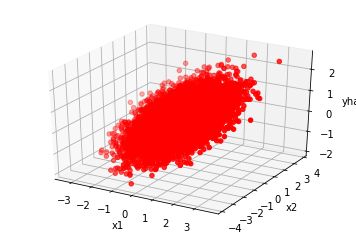

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm

model = beta_hat_0 + beta_hat_1 * x1 + beta_hat_2 * x2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y_hat, c='r', marker='o')

xx, yy = np.meshgrid(x1, x2)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('yhat')

plt.show()

## Question 3 ##

Esimtate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using a **numerical solver** to solve the ordinary least square problem, shown below, directly. Compare your results with the matrix algebra results.

$$ \min_{\mathbf{\beta}} \sum^N_{i=1} (y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) )^2 $$

Another way of estimating the vector of coefficients beta is to use a numerical solver. Using this method we seek to minimize the residuals of the model using the ordinary least square method. We start by defining a function of the residuals for each of the 10.000 different values of the X-matrix and the Y-matrix. As this is done we need to make sure that we have the sum of these residuals before we minimize the expression. When all this is done we’re using the minimize-function from the sp.optimize with respect to the vector of the coefficient beta. This yields:

In [13]:
resid_OLS=np.empty(10000)

def res_OLS(beta0_OLS, beta1_OLS, beta2_OLS):
    for i in range(10000):
        resid_OLS[i] = y[i] - (beta0_OLS + beta1_OLS*x1[i] + beta2_OLS*x2[i])
    return resid_OLS

def ssr_OLS(x_OLS):
    beta0_OLS=x_OLS[0]
    beta1_OLS=x_OLS[1]
    beta2_OLS=x_OLS[2]
    sumr_OLS = np.sum(res_OLS(beta0_OLS, beta1_OLS, beta2_OLS)**2)
    return sumr_OLS

results_OLS = sp.optimize.minimize(ssr_OLS, method='SLSQP', x0=[0.1,0.3,0.5])

print(results_OLS)

print('Estimated beta_0 is:', results_OLS.x[0])
print('Estimated beta_1 is:', results_OLS.x[1])
print('Estimated beta_2 is:', results_OLS.x[2])

     fun: 37401.57637219082
     jac: array([-0.00146484, -0.00634766, -0.01611328])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.0956821 , 0.29294299, 0.50332771])
Estimated beta_0 is: 0.09568210489705031
Estimated beta_1 is: 0.29294298849382977
Estimated beta_2 is: 0.5033277141719326


From the above we can conclude that the minimization yields the samme vector of the coefficient beta as the matrix algebra did in question 1. Intuitively this makes good sense,  as both methods are used to estimate the parameters in an OLS regression model. 

## Question 4 ##

Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **least absolute deviations (LAD)** using a numerical solver to solve the following problem directly: 

$$  \min_{\beta} \sum^N_{i=1} |y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) | $$

where $|z|$ is the absolute value of $z$.

It’s also possible to estimate the vector of coefficients beta using other methods. In this part we will estimate the vector using a numerically solver according to the LAD-method (Least absolute deviations). We’re following the same steps as in question 3 all the way until we’re defining the numerical problem. The different part is this question is when we’re defining the model. We’ve deleted the part, where the model is squared, and replaced this power by seeking the absolute value of the model. When all this is done, we’re using the minimize-function from the sp.optimize with respect to the vector of the betas. This yields:

In [15]:
resid_LAD=np.empty(10000)

def res_LAD(beta0_LAD, beta1_LAD, beta2_LAD):
    for i in range(10000):
        resid_LAD[i] = y[i] - (beta0_LAD + beta1_LAD*x1[i] + beta2_LAD*x2[i])
    return resid_LAD

def ssr_LAD(x_LAD):
    beta0_LAD=x_LAD[0]
    beta1_LAD=x_LAD[1]
    beta2_LAD=x_LAD[2]
    sumr_LAD = np.sum(np.abs(res_LAD(beta0_LAD, beta1_LAD, beta2_LAD)))
    return sumr_LAD

results_LAD = sp.optimize.minimize(ssr_LAD, method='SLSQP', x0=[0.1,0.3,0.5])

#print(results_LAD)

print('Estimated beta_0 is:', results_LAD.x[0])
print('Estimated beta_1 is:', results_LAD.x[1])
print('Estimated beta_2 is:', results_LAD.x[2])

Estimated beta_0 is: 0.09226149886602839
Estimated beta_1 is: 0.307465903632679
Estimated beta_2 is: 0.5115493841292132


We can conclude that the vector of the coefficients are different from Q1 and Q3. This is due to the choice of minimization method. In Q3 we were minimizing the sum of squared errors where we in this question are minimizing the sum of absolute errors.

## Question 5 ##

Set $N = 50$. Repeat the estimation using the **OLS** and **LAD** methods $K=5000$ times, drawing a new random sample from the data generating process each time. Compare the estimates from each method using histograms. Which method do you prefer? Explain your choice.

We first generate the beta paramters as empty lists of K=5000 observations. 

In [16]:
beta0_new = np.empty(5000)
beta1_new = np.empty(5000)
beta2_new = np.empty(5000)

We now create the for-loop that first genereates the data from random samples 5000 times. We can still just generate data from the already specified data generating process DGP, just for N=50. In general the next steps are done as in question 4, but within a for-loop that ensures the creation of 5000 of each beta value:

In [20]:
for i in range(5000):
    x1_new, x2_new, y_new = DGP(50)
    resid_new=np.empty(50)

    def res_new(beta0_new, beta1_new, beta2_new):
        
        for i in range(50):
            resid_new[i] = y_new[i] - (beta0_new + beta1_new*x1_new[i] + beta2_new*x2_new[i])
        return resid_new
    
    def ssr_new(x, beta0_new, beta1_new, beta2_new):
        beta0_new = x[0]
        beta1_new = x[1]
        beta2_new = x[2]
        sumr_new = np.sum(res_new(beta0_new, beta1_new, beta2_new)**2)
        return sumr_new
    
    results_new = optimize.minimize(ssr_new, method='SLSQP', x0=[0.1,0.3,0.5],args=(beta0_new, beta1_new, beta2_new),bounds=((-5,5),(-5,5),(-5,5)))
    beta0_new[i-1]=results_new.x[0]
    beta1_new[i-1]=results_new.x[1]
    beta2_new[i-1]=results_new.x[2]

We now do the same for the LAD-method, starting by generating the beta parameters:

In [21]:
beta0_new_lad = np.empty(5000)
beta1_new_lad = np.empty(5000)
beta2_new_lad = np.empty(5000)

We now create the for-loop that first genereates the data from random samples 5000 times - just as above, but for the LAD-method:

In [22]:
for i in range(5000):
    x1_new_lad, x2_new_lad, y_new_lad = DGP(50)
    resid_new_lad=np.empty(50)

    def res_new_lad(beta0_new_lad, beta1_new_lad, beta2_new_lad):
        
        for i in range(50):
            resid_new_lad[i] = y_new_lad[i] - (beta0_new_lad + beta1_new_lad*x1_new_lad[i] + beta2_new_lad*x2_new_lad[i])
        return resid_new_lad
    
    def ssr_new_lad(x, beta0_new_lad, beta1_new_lad, beta2_new_lad):
        beta0_new_lad = x[0]
        beta1_new_lad = x[1]
        beta2_new_lad = x[2]
        sumr_new_lad = np.sum(res_new_lad(beta0_new_lad, beta1_new_lad, beta2_new_lad)**2)
        return sumr_new_lad
    
    results_new_lad = optimize.minimize(ssr_new_lad, method='SLSQP', x0=[0.1,0.3,0.5],args=(beta0_new_lad, beta1_new_lad, beta2_new_lad), bounds=((-5,5),(-5,5),(-5,5)))
    beta0_new_lad[i-1]=results_new_lad.x[0]
    beta1_new_lad[i-1]=results_new_lad.x[1]
    beta2_new_lad[i-1]=results_new_lad.x[2]

Not that we have estimated the beta values, both by OLS- and LAD-method, we can now compare the results in a histogram. We start by comparing the intersectvalues of $beta_0$

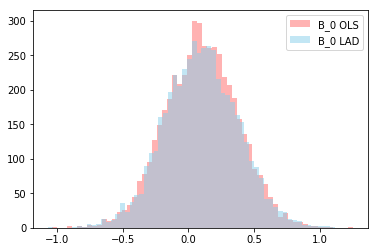

In [23]:
beta_0_hist=plt.hist(beta0_new,bins=60,color='red',label = "B_0 OLS", alpha=0.3)
beta_0_lad_hist=plt.hist(beta0_new_lad,bins=60,color='skyblue',  label = "B_0 LAD", alpha=0.5)
plt.legend()
plt.show(beta_0_hist,beta_0_lad_hist)

From the above we can see that the $\beta_{LAD}$-estimate is more concentrated around the estimate value, from Q1, of $\beta_0=0.0956821$ than the distribution of the $\beta_{OLS}$-estimate. 

Then we plot for the values of $\beta_1$

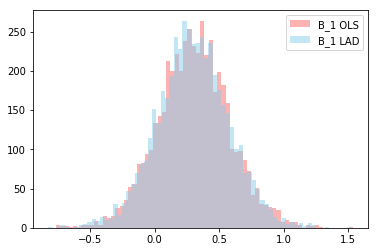

In [24]:
beta_1_hist=plt.hist(beta1_new,bins=70,color='red', alpha=0.3,label = "B_1 OLS")
beta_1_lad_hist=plt.hist(beta1_new_lad,bins=70,color='skyblue', alpha=0.5, label = "B_1 LAD")
plt.legend()
plt.show(beta_1_hist,beta_1_lad_hist)

Once again, we can see, from the above, that the $\beta_{LAD}$-estimate is more concentrated around the estimate value, from Q1, of $\beta_1=0.29294299$ than the distribution of the $\beta_{OLS}$-estimate, that seems to be wider in the distribution. 

Then we plot for the values of $\beta_2$ and compare them. 

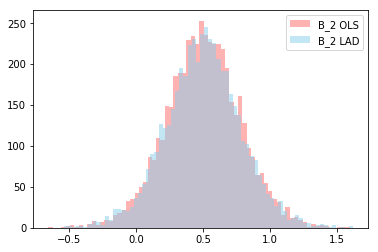

In [25]:
beta_2_hist=plt.hist(beta2_new,bins=70,color='red', alpha=0.3, label = "B_2 OLS")
beta_2_lad_hist=plt.hist(beta2_new_lad,bins=70,color='skyblue', alpha=0.5, label = "B_2 LAD")
plt.legend()
plt.show(beta_2_hist,beta_2_lad_hist)

Lastly, we can see, from the above, that the $\beta_{LAD}$-estimate, once again, is more concentrated around the estimate value, from Q1, of $\beta_2=0.50332771$ than the distribution of the $\beta_{OLS}$-estimate, that seems to be wider in the distribution.

Another way of determining the correctness of the  estimates is to check their mean as well as their variance. This is done below:


In [26]:
print("Using the OLS method we find estimates of beta_0 with mean " + str(np.mean(beta0_new)) + " and variance " + str(np.var(beta0_new)))
print("Using the LAD method we find estimates of beta_0 with mean " + str(np.mean(beta0_new_lad)) + " and variance " + str(np.var(beta0_new_lad)))

print("Using the OLS method we find estimates of beta_1 with mean " + str(np.mean(beta1_new)) + " and variance " + str(np.var(beta1_new)))
print("Using the LAD method we find estimates of beta_1 with mean " + str(np.mean(beta1_new_lad)) + " and variance " + str(np.var(beta1_new_lad)))

print("Using the OLS method we find estimates of beta_2 with mean " + str(np.mean(beta2_new)) + " and variance " + str(np.var(beta2_new)))
print("Using the LAD method we find estimates of beta_2 with mean " + str(np.mean(beta2_new_lad)) + " and variance " + str(np.var(beta2_new_lad)))                                                                                                                    

Using the OLS method we find estimates of beta_0 with mean 0.10120421355719923 and variance 0.0759056790360191
Using the LAD method we find estimates of beta_0 with mean 0.09842186717364154 and variance 0.07810662038312292
Using the OLS method we find estimates of beta_1 with mean 0.30292466660470696 and variance 0.0785903498141539
Using the LAD method we find estimates of beta_1 with mean 0.29631869644498604 and variance 0.07957753246335986
Using the OLS method we find estimates of beta_2 with mean 0.5015404889017137 and variance 0.0787543746183034
Using the LAD method we find estimates of beta_2 with mean 0.5020366336083495 and variance 0.08062757280466454


From the above investigation of the estimates mean values as well as their variance it's easier to compare them. Remeber that the true estimate values from Q1 were: $\beta_0=0.0956821$, $\beta_1=0.29294299$ and $\beta_2=0.50332771$. From this information we can conclude that the LAD-method yields closer mean-average estimates compared to the OLS-method. Furthermore it is shown that the variances of the estimation methods seems very close to each other. 

**Wich method do we prefer?**

When investigating the two different estimation methods it is noted that, instead of estimating the coefficients that minimizes the sum of squared residuals, the LAD-method estimates the coefficients that minimises the sum of the absolute residuals. This has the advantage that this estimation method is more resistant to outliers. This feature is also shown in the histogram plots of the $\beta$-estimates, where the LAD-method estimation distribution is more concentrated around the estimation results from Q1.

From the above, and with the capabilities of python-programming, we prefer the LAD-estimation method. This is even though that the LAD-estimation has the disadvantage of being more computationally expensive, which we came around using python. 

# 2) Durable purchases

Consider a **household** living in two periods.

In the **second period** it gets utility from **non-durable consumption**, $c$, and **durable consumption**, $d+\chi x$:

$$
\begin{aligned}
v_{2}(m_{2},d)&= \max_{c}\frac{(c^{\alpha}(d+\chi x)^{1-\alpha})^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
x &= m_{2}-c \\
c &\in [0,m_{2}]
\end{aligned}
$$

where 

* $m_2$ is cash-on-hand in the beginning of period 2
* $c$ is non-durable consumption
* $d$ is pre-commited durable consumption
* $x = m_2 - c$ is extra durable consumption
* $\rho > 1$ is the risk aversion coefficient
* $\alpha \in (0,1)$ is the utility weight on non-durable consumption
* $\chi \in (0,1)$ implies that extra durable consumption is *less* valuable than pre-comitted durable consumption
* the second constraint ensures the household *cannot* die in debt

The **value function** $v_2(m_2,d)$ measures the household's value of having $m_2$ at the beginning of period 2 with precomitted durable consumption of $d$. The optimal choice of non-durable consumption is denoted $c^{\ast}(m_2,d)$. The optimal extra durable consumption function is $x^{\ast}(m_2,d) = m_2-c^{\ast}(m_2,d)$.

Define the so-called **end-of-period 1 value function** as:

$$
\begin{aligned}
w(a,d)&\equiv\beta\mathbb{E}_{1}\left[v_2(m_2,d)\right]
\end{aligned}
$$

where 

$$
\begin{aligned}
m_2&= (1+r)a+y \\
y &= \begin{cases}
1-\Delta & \text{with prob. }\frac{1}{3}\\
1 & \text{with prob. }\frac{1}{3}\\
1+\Delta & \text{with prob. }\frac{1}{3}
\end{cases}\\
\end{aligned}
$$

and

* $a$ is assets at the end of period 1
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving)
* $r$ is the return on savings

In the **first period**, the household chooses it's pre-comitted level of durable consumption for the next-period,

$$
\begin{aligned}
v_{1}(m_{1})&=\max_{d} w(a,d)\\&\text{s.t.}&\\
a&= m_{1}-d \\
d&\in [0,m_{1}]\\
\end{aligned}
$$

where $m_1$ is cash-on-hand in period 1. The second constraint ensures the household *cannot* borrow. The **value function** $v_1(m_1)$ measures the household's value of having $m_1$ at the beginning of period 1. The optimal choice of pre-committed durable consumption is denoted $d^{\ast}(m_1)$.

In [31]:
# a. parameters
rho = 2
alpha = 0.8
beta = 0.96
r = 0.04
Delta = 0.25
Chi = 0.9

We define the basic function for $ v_2(m_2,d) $

In [32]:

def v2(c, m2, alpha, d, Chi, rho):
    x=m2-c #constraint
    return ((c**alpha*(d+Chi*x)**(1-alpha))**(1-rho))/(1-rho)

With inspiration from problem set 7 and lecture notes, we define the function that solves the period 2 utility function. We then add and store the found values in the v2 and c grids, which allows us to plot the functions we are asked to:

In [33]:
def solve_per_2(alpha,rho,Chi,Delta):

    # a. grids
    m2_vec = np.linspace(1e-8,10,100)
    d_vec = np.linspace(1e-8,10,100)
    v2_grid = np.empty((100,100))
    c_grid = np.empty((100,100))

    # solve for each m2 in grid
    for i,m2 in enumerate(m2_vec):
        for j,d in enumerate(d_vec):

            # Objective function
            obj = lambda c: -v2(c, m2, alpha, d, Chi, rho)

            # Initial guess
            x0 = m2/2

            # Optimize
            result_2 = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m2])

            # iv. save
            v2_grid[i,j] = -result_2.fun
            c_grid[i,j] = result_2.x
        
    return m2_vec,d_vec,v2_grid,c_grid

In [34]:
# solve
m2_vec,d_vec,v2_grid,c_grid = solve_per_2(alpha,rho,Chi,Delta)

# creating the grids
m2_grid,d_grid = np.meshgrid(m2_vec,d_vec,indexing='ij')

We plot our saved functions, using matplotlib:

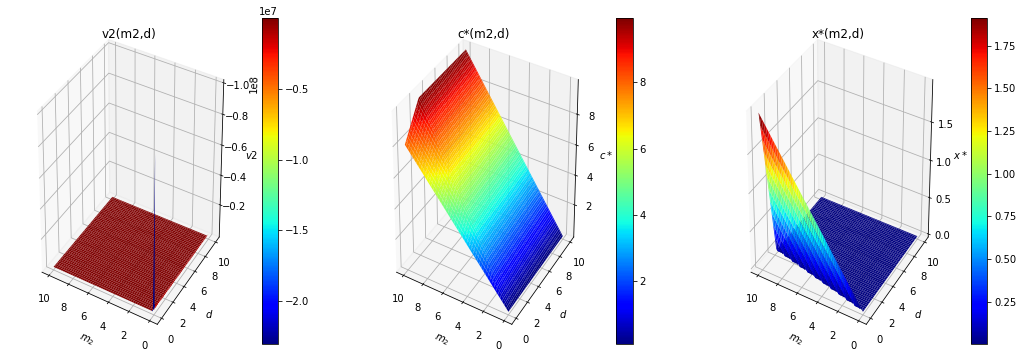

In [35]:
# create main figure
fig = plt.figure(figsize=(18,6))

# create 3 sub plots to main figure
ax = fig.add_subplot(1,3,1,projection='3d')
v2func = ax.plot_surface(m2_grid,d_grid,v2_grid,cmap=cm.jet)
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$v2$')
ax.set_title('v2(m2,d)')
ax.invert_xaxis()
ax.invert_zaxis()
fig.colorbar(v2func);

ax2 = fig.add_subplot(1,3,2,projection='3d')
cs = ax2.plot_surface(m2_grid,d_grid,c_grid,cmap=cm.jet)
ax2.set_xlabel('$m_2$')
ax2.set_ylabel('$d$')
ax2.set_zlabel('$c*$')
ax2.set_title('c*(m2,d)')
ax2.invert_xaxis()
fig.colorbar(cs);

ax3 = fig.add_subplot(1,3,3,projection='3d')
xs = ax3.plot_surface(m2_grid,d_grid,m2_grid-c_grid,cmap=cm.jet)
ax3.set_xlabel('$m_2$')
ax3.set_ylabel('$d$')
ax3.set_zlabel('$x*$')
ax3.set_title('x*(m2,d)')
ax3.invert_xaxis()
fig.colorbar(xs);

From the above we can conclude, that the first plot (left) shows the value of the function v2, as a function of cash amount and durable. Furthermore it is shown, from the plot in the middle, that $c^*$ depends positivly of the households cash in period 2 and the optimal value of non-durable consumption. Lastly it is shown that the optimal extra durable consumption function depends (partly) positively of cash-on-hand in the beginning of period 2 and the optimal extra durable consumption. 

# Question 2

Find and plot the functions $v_{1}(m_{1})$ and $d^{\ast}(m_1)$. Comment.



We start by defining the function that tells us what the first period, the household chooses it's pre-comitted level of durable consumption for the next-period. This is done the following way:

In [37]:
def v1(d,m1,r,Delta,v2_interp,beta):
    
    a = m1-d
    
    # v2 if low income 
    m2_low = (1+r)*a + (1-Delta)
    v2_low = v2_interp([m2_low,d])[0]
    
    # v2 if neutral income
    m2_n = (1+r)*a + 1
    v2_n = v2_interp([m2_n,d])[0]
    
    # v2 if high income
    m2_high = (1+r)*a + (1+Delta)
    v2_high = v2_interp([m2_high,d])[0]
    
    # expected v2
    v2_exp = (1/3)*v2_low + (1/3)*v2_n + (1/3)*v2_high
    
    return beta*v2_exp


With inspiration from problem set 7 and lecture notes, we define the function that solves the period 1 utility function. We then add and store the found values in the v1 and d vec, which allows us to plot the functions we are asked to:

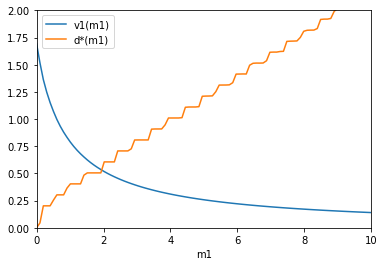

In [38]:
def solve_per_1(r,Delta,v1,v2_interp,beta):
    
    m1_vec = np.linspace(1e-8,10,100)
    d1_vec = np.empty(100)
    v1_vec = np.empty(100)
    
    # solve for each m1 in grid
    for i,m1 in enumerate(m1_vec):

            # Objective function
            obj = lambda d: -v1(d[0],m1,r,Delta,v2_interp,beta)

            # Initial guess
            x0 = m1/2

            # Optimize
            result_1 = optimize.minimize(obj,x0,method='SLSQP',bounds=((1e-8,m1),))

            # iv. save
            v1_vec[i] = result_1.fun
            d1_vec[i] = result_1.x
        
    return m1_vec,v1_vec,d1_vec

# Interpolator
v2_interp = interpolate.RegularGridInterpolator([m2_vec,d_vec],v2_grid,bounds_error=False,fill_value=None)

# Solve for period 1
m1_vec,v1_vec,d1_vec = solve_per_1(r,Delta,v1,v2_interp,beta)

# Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(m1_vec,v1_vec,label='v1(m1)')
ax.plot(m1_vec,d1_vec,label='d*(m1)')
ax.legend(loc='upper left')
ax.set_xlabel('m1')
ax.set_xlim([0,10])
ax.set_ylim([0,2]);


From the above illustration it is shown that $d^*(m_1)$, the pre-commited durable consumption in period 1, depends positively on the cash on hand in period 1. Furthermore it is shown, that $v_1(m_1)$, the household's value of having cash on hand at the beginning of period 1, depends negatively of the value of cash on hand in period 1. 


# Question 3
For which values of $m_0$ and  $d_0$ is the optimal choice not to adjust, i.e. $z = 0$? Show this in a plot. Give an interpretion of your results.

To solve this problem we basicially define and evaluate the functions $ w(m_0, d_0) $ and $ v_1(m_0+(1+\Lambda)d_0 $. We then plot the function values for each of the two, and plot those against m0 and d0. This allows us to compare the two plots and look for values of m0 and d0 for which the function value of  $ w(m_0, d_0) $ (where z=0) is higher than the function value of $ v_1(m_0+(1-\Lambda)d_0 $ (where z=1). The methods of solving and plotting the functions are based completely on the way we solved the previous sub questions of question 2 above. 

In [39]:
Lambda = 0.2

def w0(m0,d0,r,Delta,v2_interp,beta):
    
    # v2 if low 
    m2_low = (1+r)*m0 + (1-Delta)
    v2_low = v2_interp([m2_low,d0])[0]
    
    # v2 if neutral
    m2_n = (1+r)*m0 + 1
    v2_n = v2_interp([m2_n,d0])[0]
    
    # v2 if high
    m2_high = (1+r)*m0 + (1+Delta)
    v2_high = v2_interp([m2_high,d0])[0]
    
    # expected v2
    v2_exp = (1/3)*v2_low + (1/3)*v2_n + (1/3)*v2_high
    
    return beta*v2_exp


In [40]:
def solve_per_0(r,Delta,v2_interp,beta):

    # a. grids
    m0_vec = np.linspace(1e-8,6,100)
    d0_vec = np.linspace(1e-8,3,100)
    v0_grid = np.empty((100,100))

    # solve for each m2 in grid
    for i,m0 in enumerate(m0_vec):
        for j,d0 in enumerate(d0_vec):

            # Objective function
            obj = lambda x: -w0(m0,d0,r,Delta,v2_interp,beta)

            # Initial guess
            x0 = m0/2

            # Optimize
            result_0 = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m0])

            # iv. save
            v0_grid[i,j] = -result_0.fun
            #c_grid[i,j] = result_2.x
        
    return m0_vec,d0_vec,v0_grid #,c_grid

In [41]:
# solve
m0_vec,d0_vec,v0_grid = solve_per_0(r,Delta,v2_interp,beta)

# grids
m0_grid,d0_grid = np.meshgrid(m0_vec,d0_vec,indexing='ij')

In [42]:
def v11(d0,m0,d,Lambda,r,Delta,v2_interp,beta):
    
    m1 = (m0+(1-Lambda)*d0) 
    
    a = m1-d
    
    # v2 if low 
    m2_low = (1+r)*a + (1-Delta)
    v2_low = v2_interp([m2_low,d])[0]
    
    # v2 if neutral
    m2_n = (1+r)*a + 1
    v2_n = v2_interp([m2_n,d])[0]
    
    # v2 if high
    m2_high = (1+r)*a + (1+Delta)
    v2_high = v2_interp([m2_high,d])[0]
    
    # expected v2
    v2_exp = (1/3)*v2_low + (1/3)*v2_n + (1/3)*v2_high
    
    return beta*v2_exp

In [43]:
def solve_per_11(Lambda,r,Delta,v2_interp,beta):

    # a. grids
    m0_vec = np.linspace(1e-8,6,100)
    d0_vec = np.linspace(1e-8,3,100)
    v11_grid = np.empty((100,100))

    # solve for each m2 in grid
    for i,m0 in enumerate(m0_vec):
        for j,d0 in enumerate(d0_vec):

            # Objective function
            obj = lambda x11: -v11(x11,d0,m0,Lambda,r,Delta,v2_interp,beta)

            # Initial guess
            x0 = m0/2

            # Optimize
            result_11 = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m0])

            # iv. save
            v11_grid[i,j] = -result_11.fun
            #c_grid[i,j] = result_2.x
        
    return m0_vec,d0_vec,v11_grid #,c_grid

In [44]:
# solve
m0_vec,d0_vec,v11_grid = solve_per_11(Lambda,r,Delta,v2_interp,beta)

# grids
m0_grid,d0_grid = np.meshgrid(m0_vec,d0_vec,indexing='ij')

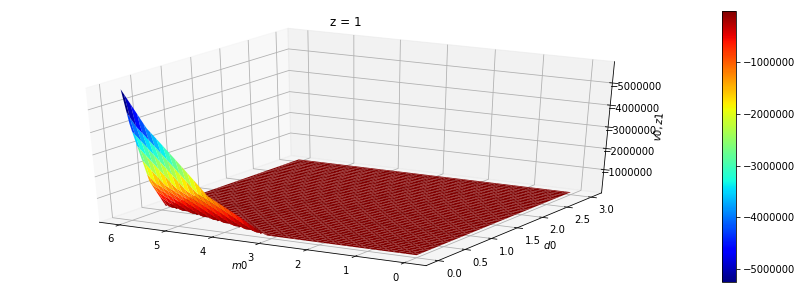

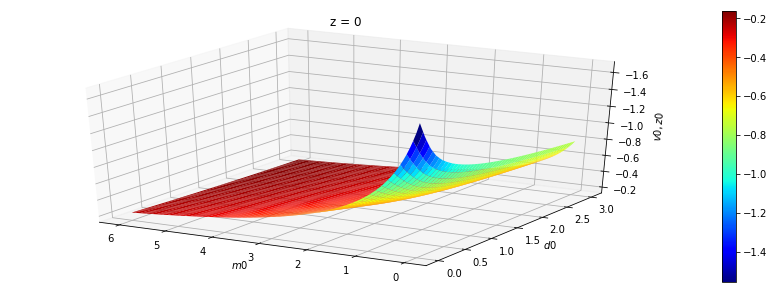

In [45]:
fig = plt.figure(figsize=(15,5))

# create 3 sub plots to main figure
ax = fig.add_subplot(1,1,1,projection='3d')
v11func = ax.plot_surface(m0_grid,d0_grid,v11_grid,cmap=cm.jet)
ax.set_xlabel('$m0$')
ax.set_ylabel('$d0$')
ax.set_zlabel('$v0,z1$')
ax.set_title('z = 1')
ax.invert_xaxis()
ax.invert_zaxis()
fig.colorbar(v11func);

fig = plt.figure(figsize=(15,5))

# create 3 sub plots to main figure
ax = fig.add_subplot(1,1,1,projection='3d')
v0func = ax.plot_surface(m0_grid,d0_grid,v0_grid,cmap=cm.jet)
ax.set_xlabel('$m0$')
ax.set_ylabel('$d0$')
ax.set_zlabel('$v0,z0$')
ax.set_title('z = 0')
ax.invert_xaxis()
ax.invert_zaxis()
fig.colorbar(v0func);

To evaluate for which d0 and m2 the optimal choice is not to adjust, we compare the two plots above. We evaluate for which values of m0 and d0 that v0.v0 (v0 for z=0) is larger than v0.z1 (v0 for z=1). For the interval of v0's and d0's in which v0 for z=0 is larger than v0 for z=1, the optimal choice is **Not to adjust**.

# 3) Gradient decent

Let $\boldsymbol{x} = \left[\begin{array}{c}
x_1 \\
x_2\\
\end{array}\right]$ be a two-dimensional vector. Consider the following algorithm:

**Algorithm:** `gradient_descent()`

**Goal:** Minimize the function $f(\boldsymbol{x})$.

1. Choose a tolerance $\epsilon>0$, a scale factor $ \Theta > 0$, and a small number $\Delta > 0$
2. Guess on $\boldsymbol{x}_0$ and set $n=1$
3. Compute a numerical approximation of the jacobian for $f$ by

    $$
    \nabla f(\boldsymbol{x}_{n-1}) \approx \frac{1}{\Delta}\left[\begin{array}{c}
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    \Delta\\
    0
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})\\
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    0\\
    \Delta
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})
    \end{array}\right]
    $$

4. Stop if the maximum element in $|\nabla f(\boldsymbol{x}_{n-1})|$ is less than $\epsilon$
5. Set $\theta = \Theta$ 
6. Compute $f^{\theta}_{n} = f(\boldsymbol{x}_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1}))$
7. If $f^{\theta}_{n} < f(\boldsymbol{x}_{n-1})$ continue to step 9
8. Set $\theta = \frac{\theta}{2}$ and return to step 6     
9. Set $x_{n} = x_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1})$
10. Set $n = n + 1$ and return to step 3

**Question:** Implement the algorithm above such that the code below can run.

**Optimizer function:**
We follow the steps given from the question description and implement them in the algorithm. This yields:

In [46]:
def gradient_descent(f, x0, epsilon =1e-6, Theta = 0.9, Delta = 1e-8, max_iter=10000):
    
    n = 1 # n is number of iterations
    
    # Preparing list to contain x-values and setting first element as x0
    x_list = np.zeros([max_iter,2]) 
    x_list[0] = x0
    
    # Preparing to vectors with delta 
    delta_array0 = np.array([Delta, 0])
    delta_array1 = np.array([0, Delta])
    
    
    # Iterate in this loop up to 10.000 times
    while (n < max_iter):
    
        # Compute numerical approximation of the jacobian for f
        delta_fxn_1 = 1/Delta * np.array([(f(x_list[n-1] + delta_array0) - f(x_list[n-1])),\
                                         (f(x_list[n-1] + delta_array1) - f(x_list[n-1]))])
        
        # Stop if maximum element in list of absolute value is less then epsilon
        if (np.max(np.abs((delta_fxn_1))) < epsilon):
            break
        
        # If not, continue algortihm
        else:                                 
            theta = Theta
            
            # Compute fntheta 
            fntheta = f(x_list[n-1] - theta*Delta*f(x_list[n-1]))
            
            # Instead of making ifelse-statements go into this while loop 
            # when fntheta is larger than f(xn-1) and jump out when its not the case 
            # anymore
            while fntheta >= f(x_list[n-1]):
                theta = theta/2
                fntheta = f(x_list[n-1] - theta*Delta*f(x_list[n-1]))

            # compute next x-value 
            x_list[n] = x_list[n-1] - theta*Delta*f(x_list[n-1])
            
            # continue loop
            n = n + 1
    
    return(x_list[n-1], n)

**Run of algoritm:**

In [47]:
def rosen(x):
    return (1.0 - x[0])**2 + 2*(x[1]-x[0]**2)**2


x0 = np.array([1.1,1.1])

try:
    x, it = gradient_descent(rosen, x0)
    print(f'minimum found at ({x[0]:.4f}, {x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

minimum found at (1.1000, 1.1000) after 10000 iterations
not implemented yet


Thus we can see, that the algorithm yields a minimum, after 10.000 iterations, at (1.1, 1.1)